In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set(context='poster', font_scale=1.2)
sns.set_style('whitegrid')

In [10]:
import os
import glob
data_path = '/home/sueliu/sensewhere/3d-grid/data/zips'
logs = [f for f in os.listdir(data_path) if 'data_transaction_logs_' in f]

In [24]:
logs

['data_transaction_logs_20170922164354.csv',
 'data_transaction_logs_20170921170555.csv',
 'data_transaction_logs_20170921172533.csv',
 'data_transaction_logs_20171002165918.csv']

In [32]:
def plot_features(track_id):
    plt.figure(figsize=(16, 8))
    height_file = '/home/sueliu/sensewhere/3d-grid/data/height_{}.txt'.format(track_id)
    height_df = pd.read_csv(height_file)
    plt.plot(height_df['timestamp'], height_df['raw_height'], linewidth=1)
    plt.title('Track 2017092117055')
    plt.xlabel('Timestamp')
    plt.ylabel('Raw height')
    
    log_file = os.path.join(data_path, 'data_transaction_logs_{}.csv'.format(track_id))
    df = pd.read_csv(log_file)
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(df.pivot_table('data.Rssi', 
                           columns='settings.timestamp', 
                           index='data.mac'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('mac')
    ax.set_title('Mean RSSI value for each mac at each timestamp')

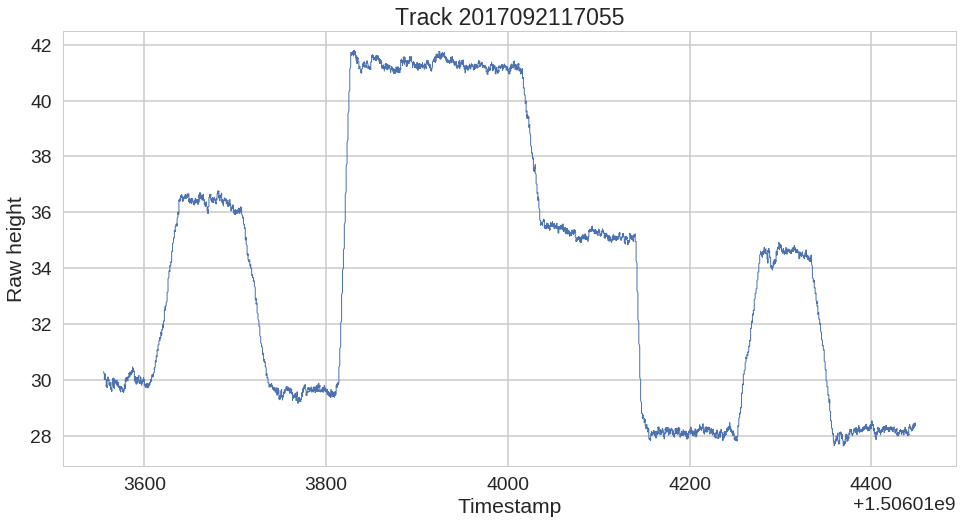

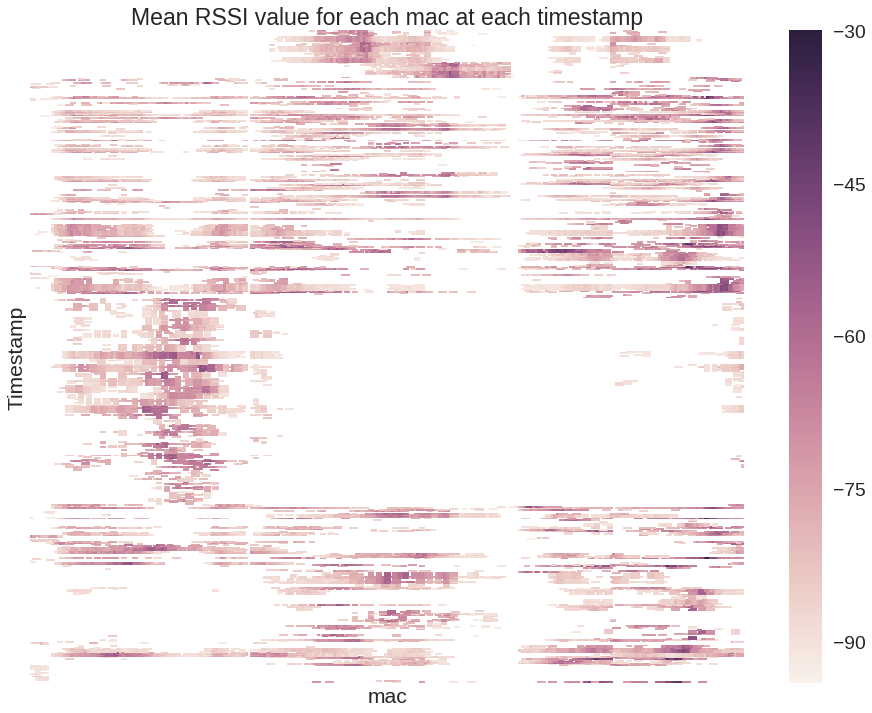

In [34]:
plot_features(20170921170555)

In [15]:
df.head()

,data.Rssi,data.mac,settings.timestamp
0,-84,256040837904932,1506098636
1,-86,93149419986456,1506098636
2,-75,31397763470485,1506098636
3,-82,238140990862355,1506098636
4,-81,129957565956,1506098636
